### Step1. Downloading the cleaned tiwitter data from object storage and displaying first 5 rows

In [17]:
import urllib.request
import ast
import pandas as pd 

target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/tweets_cleaned.csv"
file_name="tweets_cleaned.csv"
urllib.request.urlretrieve(target_url, file_name)

tweets = pd.read_csv(file_name,parse_dates=['created_at_date']) 
tweets.head()

,created_at_date,hashtags_string,user_string,user_location,lang,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned
0,2018-11-02 21:01:56,,Symin16,Toronto ✈ Calgary,en,NaN,NaN,♠,jessmayumba85,@Symin16 I’d like to know who,I’d like to know who
1,2018-11-02 21:02:01,,TwoCanSamAdams,YYC,en,NaN,NaN,hannahrae cuddleslug,thimblewad,"@TwoCanSamAdams Legit. There are still chunks in the sink and I can’t stand to be in the room, even though it doesn’t smell like puke anymore. I’m just so done with today.","Legit. There are still chunks in the sink and I can’t stand to be in the room, even though it doesn’t smell like puke anymore. I’m just so done with today."
2,2018-11-02 21:02:05,job Calgary SupplyChain Hiring CareerArc,,Calgary,en,51.004583,-114.007914,TMJ - CAL Manuf Jobs,tmj_cal_manuf,"Can you recommend anyone for this #job in #Calgary, AB? #SupplyChain #Hiring #CareerArc","Can you recommend anyone for this in , AB?"
3,2018-11-02 21:02:10,,,🌎📱,en,NaN,NaN,Sunny Rai,TheSunsRay,Kids See Ghosts: love this track,Kids See Ghosts: love this track
4,2018-11-02 21:02:13,Calgary job,,Calgary,en,50.997882,-114.074005,TMJ-CAL Retail Jobs,tmj_cal_retail,"See our latest #Calgary, AB #job and click to apply: barista - Store# 54359, CHINOOK CENTRE FOOD COURT - #Retail #Hiring #CareerArc","See our latest , AB and click to apply: barista - Store# 54359, CHINOOK CENTRE FOOD COURT -"


###  Step2. Wordcloud for the "extended_tweet_cleaned"

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print(STOPWORDS)

{'he', "i've", 'why', 'all', 'were', 'what', "aren't", "you'd", "it's", "she'd", 'not', 'we', 'as', "you've", 'above', 'about', 'com', 'how', 'in', "wouldn't", 'ever', 'get', 'then', 'over', "can't", "mustn't", "you're", "wasn't", 'with', 'more', 'since', 'otherwise', 'she', "haven't", 'each', "there's", 'which', 'however', "don't", 'herself', 'from', 'who', "doesn't", 'its', 'few', 'and', "couldn't", 'such', "he's", 'yourself', 'does', "where's", 'http', 'of', 'r', 'below', "we'd", "won't", 'down', 'yourselves', 'doing', 'the', 'was', 'theirs', 'you', "let's", 'they', 'had', "that's", "i'm", 'this', 'for', 'hers', 'other', 'only', "i'll", 'their', 'both', "didn't", "hadn't", "here's", 'when', 'out', 'up', 'ought', 'there', 'ourselves', 'through', 'your', 'www', 'because', "he'd", 'him', "why's", "they've", 'off', 'before', 'same', 'during', 'are', 'these', 'our', 'those', "weren't", 'until', 'while', 'her', "she's", 'between', "when's", 'too', 'a', 'would', 'own', 'on', 'or', 'himself

In [3]:
stopwords = set(STOPWORDS)
def wordcloud(tweets,col):
    wordcloud = WordCloud(collocations=False,background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off") 

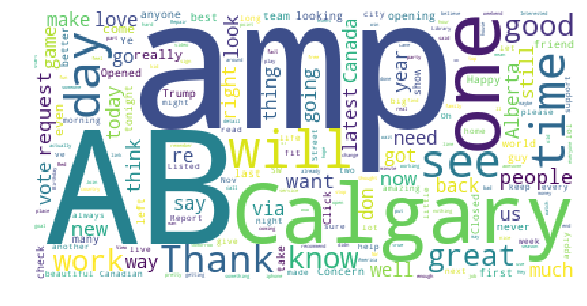

In [4]:
wordcloud(tweets,'extended_tweet_cleaned')

#### Amp? (investigate and remove)

In [5]:
pd.set_option('max_colwidth', 700)
tweets[tweets['extended_tweet_cleaned'].str.contains("amp")]['extended_tweet_cleaned'].head()

6                                                    Please read and share and donate ten bucks. There are 5 homeless memorials in Canada and Calgary needs to be  . This is important. This is the starting point of our Campaign and we need to get to $10000. Give us a hand please and thank you
29                                                                                                                                                        Weather might be cold but we’re coming in hot this weekend with our brunch!!! Sat &amp; Sun at 10AM.     @ Cleaver, 50 Seats &amp; a Cow. 
69                                                                                                                                          Closed Report Concern Not Listed request at 313 18 AV SW  Completed. link: 18-01068530 corporate - encampment concerns linked nov 02, 2018 03:17:06 pm. 
86    A tale of two countries, in the US the GDP is growing, in Canada it’s slowing. In the US jobs are plentiful &amp; w

In [6]:
tweets['extended_tweet_cleaned']=tweets['extended_tweet_cleaned'].str.replace('&amp',' ')

#### Exclude "one" and "will" words

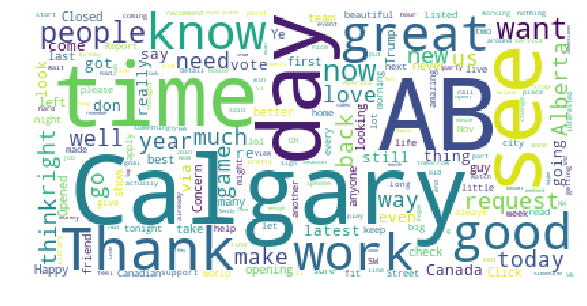

In [7]:
stopwords.add("one")
stopwords.add("will")
wordcloud(tweets,'extended_tweet_cleaned')

#### Excersise: add Calgary and AB(or othwer words) to stowords to  exclude them from wordcloud.

In [8]:
stopwords.add("Calgary") ## this will be hidden
stopwords.add("AB")

###  Step3. Plotting most common user mentions and hashtags
#### Most common hashtags

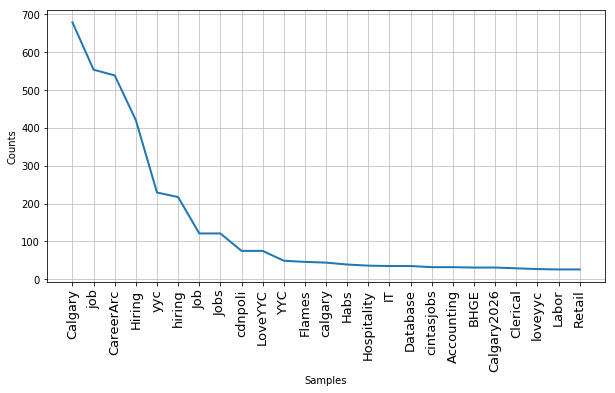

In [9]:
import nltk
all_hashtags=" ".join([i for i in tweets['hashtags_string']]).split()
plt.figure(figsize=(10,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_hashtags)
fd.plot(25,cumulative=False)

#### Excersise : plot most common user mentions

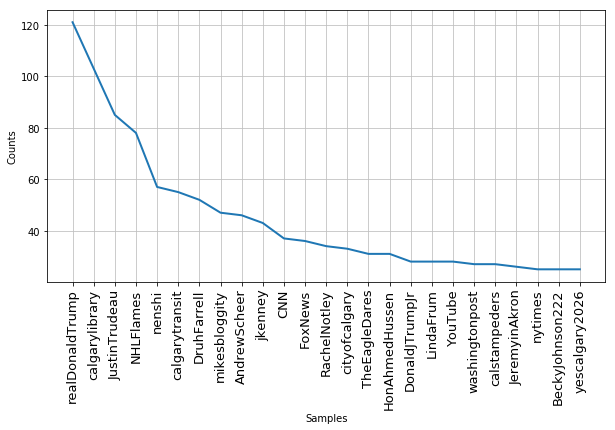

In [10]:
### this will be hidden
all_users=" ".join([i for i in tweets['user_string']]).split()
plt.figure(figsize=(10,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_users)
fd.plot(25,cumulative=False)

###  Step4. Displaying tweet locations on the map

In [11]:
import math
print("Time range: ",min(tweets["created_at_date"]),"-",max(tweets["created_at_date"]))
print("Total number of tweets: ",tweets.shape[0])
tweets_have_location=tweets[tweets["longitude"].notnull()]
print("Number of tweets having location data: ",tweets_have_location.shape[0])

Time range:  2018-11-02 21:01:56 - 2018-11-09 17:06:22
Total number of tweets:  14793
Number of tweets having location data:  2321


#### Subset data for one day

In [12]:
tweets_subset_nov5=tweets_have_location.loc[tweets_have_location["created_at_date"].dt.day==5]
print("Number of tweets having location data for Nov 5: ",tweets_subset_nov5.shape[0])

Number of tweets having location data for Nov 5:  517


In [13]:
import folium
from folium.plugins import MarkerCluster

In [14]:
calgary_coords = [51.0486, -114.0708]
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_nov5.iterrows():
        #print(row["name"].encode('ascii', errors='ignore').decode()) ### Pop up is not working
        #folium.Marker([row["longitude"], row["latitude"]], popup=row["name"].encode('ascii', errors='ignore').decode()).add_to(my_map)
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

####  Excersise : try subsetting data for other day, make pupup working

#### Save data to csv

In [18]:
tweets.to_csv('tweets_cleaned1.csv',index=False)